In [1]:
include("common.jl")
using PSet1Common

In [2]:
q5_x, q5_y = loadtxt("q5a_data.txt")
q5_dx, q5_dy = loadtxt("q5b_data.txt")

2-element Array{Array{Float64,1},1}:
 [-0.0029,0.0007,-0.0082,-0.0038,-0.0041,0.0026,-0.0001,-0.0058,-0.0005,-0.0034]
 [-0.0033,0.0043,0.0006,0.002,0.0044,0.0009,0.0028,0.0034,0.0059,0.0024]        

In [3]:
function fit_orbit(xs, ys)
    len = length(xs)
    if length(ys) != len
        throw(ArgumentError("xs and ys should have the same length"))
    end
    x2 = xs.^2
    T = promote_type(eltype(xs), eltype(ys))
    A = Matrix{T}(len, 5)
    @inbounds @simd for i in 1:len
        x = xs[i]
        y = ys[i]
        A[i, 1] = 1
        A[i, 2] = x
        A[i, 3] = y
        A[i, 4] = x * y
        A[i, 5] = y^2
    end
    A'*A \ (A'*x2)
end

fit_orbit (generic function with 1 method)

In [4]:
function calc_elliptical(bs)
    # b0 + b1 cosθ r + b2 sinθ r + b3 sinθ cosθ r^2 + b4 sin^2θ r^2 = cos^2θ r^2
    # b0 + (b1 cosθ + b2 sinθ) r + (b3 sinθ cosθ + b4 sin^2θ - cos^2θ) r^2 = 0
    xs = Float64[]
    ys = Float64[]
    b0, b1, b2, b3, b4 = bs
    for θ in linspace(0, 2π, 1000000)
        st = sin(θ)
        ct = cos(θ)
        a = b3 * st * ct + b4 * st^2 - ct^2
        b = b1 * ct + b2 * st
        c = b0
        Δ = b^2 - 4 * a * c
        if Δ < 0
            continue
        end
        r1 = (-b - √(Δ)) / (2a)
        push!(xs, r1 * ct)
        push!(ys, r1 * st)
        r2 = (-b + √(Δ)) / (2a)
        push!(xs, r2 * ct)
        push!(ys, r2 * st)
    end
    xs, ys
end

calc_elliptical (generic function with 1 method)

In [5]:
orbit1 = fit_orbit(q5_x, q5_y);
orbit2 = fit_orbit(q5_x + q5_dx, q5_y + q5_dy);

In [6]:
xs1, ys1 = calc_elliptical(orbit1);
xs2, ys2 = calc_elliptical(orbit2);

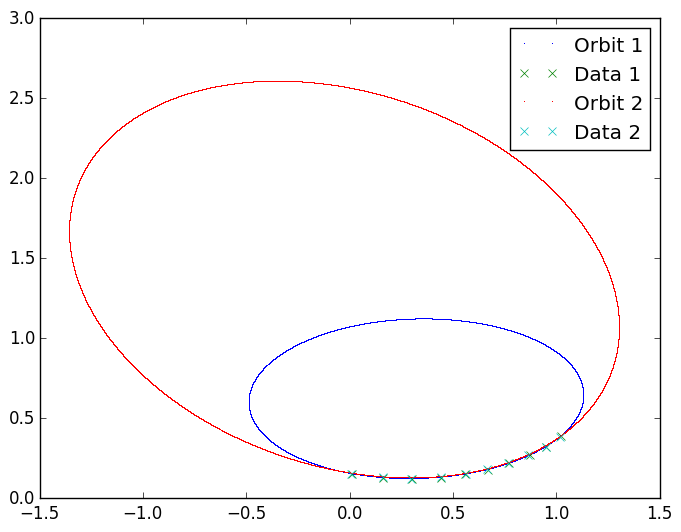

PyObject <matplotlib.legend.Legend object at 0x7f8079b02e48>

In [7]:
plot(xs1, ys1, "b,", label="Orbit 1")
plot(q5_x, q5_y, "gx", label="Data 1")

plot(xs2, ys2, "r,", label="Orbit 2")
plot(q5_x + q5_dx, q5_y + q5_dy, "cx", label="Data 2")
legend()